#### 2025/11/15_16 과제 : 자동차 부품 품질 검사 데이터 분석

목적
- 생산 결함을 감지하고 분류하기 위해 자동화 제조 시스템에서 수집된 1,854개 행의 실제 센서 데이터로 구성
- 온도, 진동, 음향 신호, 습도, 압력, 모터 전류, RPM, 표면 반사율, 기계 사이클, 시간, 공구 마모 수준 등 도메인별 특징이 포함
- 각 인스턴스에는 결함 유형(정상, 표면 균열, 과열, 진동 이상)이 표시

In [2]:
## 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
## 데이터 불러서 확인하기
DATA_FILE = '../data/smart_quality_inspection_dataset.csv'
df = pd.read_csv(DATA_FILE)
df.head()

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
0,0.046846,0.747276,-0.115297,-0.920363,-1.195644,-0.953782,-1.143734,2.891212,-0.877729,-0.038431,63.621048,0.705596,52.986256,Surface Crack
1,-0.086770,1.413315,0.429374,0.424495,0.174386,0.275093,0.322255,-0.627408,-0.917360,0.058642,58.142729,3.463638,49.447204,No Fault
2,-0.536923,0.184367,-1.079265,-1.473758,-1.279324,-0.073878,-1.615569,1.949660,1.952232,0.885493,57.099583,5.502285,23.220863,No Fault
3,-0.369409,-0.483601,0.296536,0.596621,0.296258,-1.310473,-0.189909,0.533266,-2.361538,-1.105311,70.307374,6.750232,44.256296,Overheating
4,0.525870,-0.312140,-0.311123,1.108442,-0.053811,-0.473454,-0.308574,-0.275646,-0.834540,-0.222531,59.947956,5.152318,36.517987,No Fault


HOG_F1 ~ 10의 열과 Temperature(온도), Vibration(진동), Acoustic(소음)에 따른 Fault_Type(결함 유형)을 원인이 뭔지 구분해보자

In [4]:
## 데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1854 entries, 0 to 1853
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HOG_F1       1854 non-null   float64
 1   HOG_F2       1854 non-null   float64
 2   HOG_F3       1854 non-null   float64
 3   HOG_F4       1854 non-null   float64
 4   HOG_F5       1854 non-null   float64
 5   HOG_F6       1854 non-null   float64
 6   HOG_F7       1854 non-null   float64
 7   HOG_F8       1854 non-null   float64
 8   HOG_F9       1854 non-null   float64
 9   HOG_F10      1854 non-null   float64
 10  Temperature  1854 non-null   float64
 11  Vibration    1854 non-null   float64
 12  Acoustic     1854 non-null   float64
 13  Fault_Type   1854 non-null   object 
dtypes: float64(13), object(1)
memory usage: 202.9+ KB


In [5]:
df.describe(include='all')

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No Fault
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,670
mean,0.007511,0.005424,0.021024,-0.007397,-0.010008,0.036029,0.017027,-0.000847,-0.010239,0.006953,66.850375,6.582042,53.174158,NaN
std,1.046899,1.015924,0.990626,1.005499,0.994329,0.981144,0.979579,0.959864,1.024007,0.964515,16.524104,3.805618,16.462969,NaN
min,-3.404486,-3.342404,-3.264831,-3.107820,-3.375559,-3.133530,-3.521808,-3.967711,-4.186148,-3.029159,31.005898,-0.814874,3.888350,NaN
25%,-0.697087,-0.684571,-0.687283,-0.694222,-0.708480,-0.620500,-0.660615,-0.666945,-0.744053,-0.663509,55.238932,3.980777,41.393738,NaN
50%,-0.010524,-0.008746,0.028988,-0.005490,-0.034153,0.018276,0.026578,0.013786,-0.017978,0.010137,63.523370,5.583499,52.826402,NaN
75%,0.721841,0.652332,0.689892,0.694671,0.644900,0.696094,0.688380,0.652807,0.692269,0.670314,75.299011,8.138124,63.890845,NaN


In [6]:
df.isnull().sum()

HOG_F1         0
HOG_F2         0
HOG_F3         0
HOG_F4         0
HOG_F5         0
HOG_F6         0
HOG_F7         0
HOG_F8         0
HOG_F9         0
HOG_F10        0
Temperature    0
Vibration      0
Acoustic       0
Fault_Type     0
dtype: int64

In [7]:
## 결함 유형에는 어떤 것이 있는지 먼저 확인해보기
df['Fault_Type'].unique()       ## => 출력 결과 ('Surface Crack', 'No Fault', 'Overheating', 'Abnormal Vibration') 존재

# Surface Crack      : 표면 균열        => Acoustic
# No Fault           : 결함 없음        => X
# Overheating        : 과열             => Temperatrue
# Abnormal Vibration : 비정상 진동      => Vibration

array(['Surface Crack', 'No Fault', 'Overheating', 'Abnormal Vibration'],
      dtype=object)

In [8]:
## 상관관계 확인해보기
df_corr = df.copy()
df_corr['Fault_Type'] = df_corr['Fault_Type'].astype('category').cat.codes # 이렇게 하면 Fault type이 0,1,2,3으로 바뀜
df_corr

,HOG_F1,HOG_F2,HOG_F3,HOG_F4,HOG_F5,HOG_F6,HOG_F7,HOG_F8,HOG_F9,HOG_F10,Temperature,Vibration,Acoustic,Fault_Type
0,0.046846,0.747276,-0.115297,-0.920363,-1.195644,-0.953782,-1.143734,2.891212,-0.877729,-0.038431,63.621048,0.705596,52.986256,3
1,-0.086770,1.413315,0.429374,0.424495,0.174386,0.275093,0.322255,-0.627408,-0.917360,0.058642,58.142729,3.463638,49.447204,1
2,-0.536923,0.184367,-1.079265,-1.473758,-1.279324,-0.073878,-1.615569,1.949660,1.952232,0.885493,57.099583,5.502285,23.220863,1
3,-0.369409,-0.483601,0.296536,0.596621,0.296258,-1.310473,-0.189909,0.533266,-2.361538,-1.105311,70.307374,6.750232,44.256296,2
4,0.525870,-0.312140,-0.311123,1.108442,-0.053811,-0.473454,-0.308574,-0.275646,-0.834540,-0.222531,59.947956,5.152318,36.517987,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1849,0.147408,-0.121048,-0.275545,-0.383891,1.133566,0.282000,-1.520501,0.132910,1.517748,-0.461473,49.521390,15.688499,39.238204,0
1850,-0.384747,0.631838,-0.855179,-1.180763,-1.564962,0.679784,0.869498,-0.585282,-1.154596,0.870035,56.235505,5.870908,37.967497,1
1851,-0.125707,-2.006921,0.371849,0.291351,1.388480,0.839362,0.895828,-0.877541,-1.352855,0.512570,60.733729,10.721070,33.766704,0
1852,0.018464,0.646381,0.125657,1.444634,-0.431179,0.041910,-0.633165,-0.874990,1.324975,-0.113348,55.918872,5.402331,43.694638,1


In [9]:
## 상관관계 출력
corr_with_fault = df_corr.corr()['Fault_Type'].drop('Fault_Type')
print(corr_with_fault.sort_values(ascending=False))

Acoustic       0.309946
Temperature    0.211887
HOG_F7         0.049468
HOG_F1         0.019139
HOG_F6         0.016357
HOG_F3         0.012690
HOG_F4         0.007569
HOG_F5         0.002398
HOG_F9         0.001208
HOG_F10       -0.008758
HOG_F2        -0.016243
HOG_F8        -0.047229
Vibration     -0.605117
Name: Fault_Type, dtype: float64


C:\Users\KDT\AppData\Local\Temp\ipykernel_25204\1897533206.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=faults)


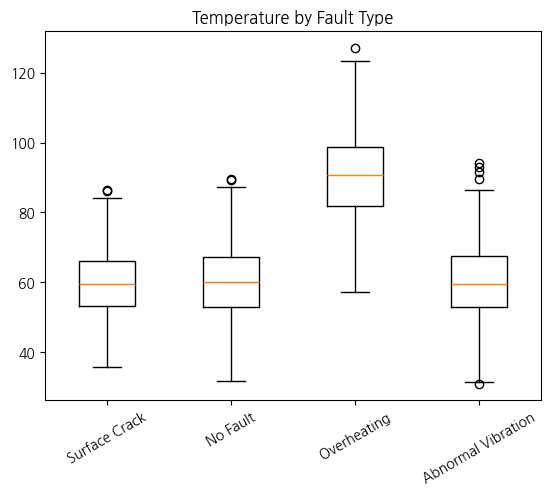

In [10]:
## No Fault 같은 경우엔 결함이 없는 것이니 이 경우의 값과 결함이 존재할 때의 값을 비교해보기
##          No Fault 대비 어떤 파라미터가 눈에 띄는지 (그 값이 영향을 줬을 확률이 높다.)

## 먼저 온도부터
# (1) 온도
faults = df['Fault_Type'].unique()

data = [df[df['Fault_Type'] == f]['Temperature'] for f in faults]

plt.boxplot(data, labels=faults)
plt.title("Temperature by Fault Type")
plt.xticks(rotation=30)
plt.show()          # => Overheating이 높다

C:\Users\KDT\AppData\Local\Temp\ipykernel_25204\3229435200.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=faults)


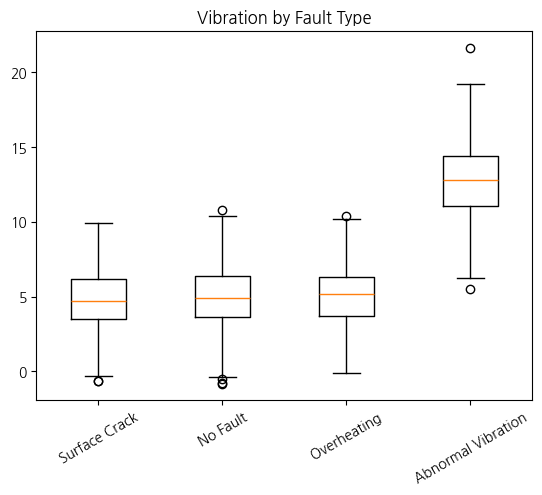

In [11]:
# (2) 진동
faults = df['Fault_Type'].unique()

data = [df[df['Fault_Type'] == f]['Vibration'] for f in faults]

plt.boxplot(data, labels=faults)
plt.title("Vibration by Fault Type")
plt.xticks(rotation=30)
plt.show()          # => Abnormal Vibration이 높다

C:\Users\KDT\AppData\Local\Temp\ipykernel_25204\3524891656.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=faults)


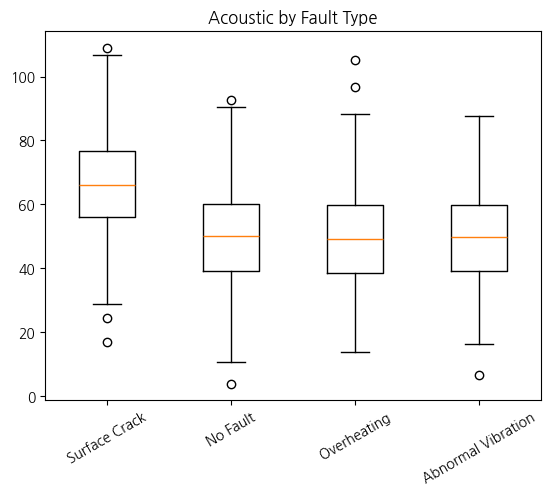

In [12]:
# (3) 소음
faults = df['Fault_Type'].unique()

data = [df[df['Fault_Type'] == f]['Acoustic'] for f in faults]

plt.boxplot(data, labels=faults)
plt.title("Acoustic by Fault Type")
plt.xticks(rotation=30)
plt.show()          # => Surface Crack이 높다

각 결함에 대한 값을 비교하기 위해 대표 3개의 열을 불러들였을 때,
1. Temperature 열의 값은 Overheating이 발생하였을 때 높다.
2. Vibration 열의 값은 Abnormal Vibration 결함이 발생하였을 때 높다.
3. Acoustic 열의 값은 Surface Crack 결함이 발생하였을 때 높다.

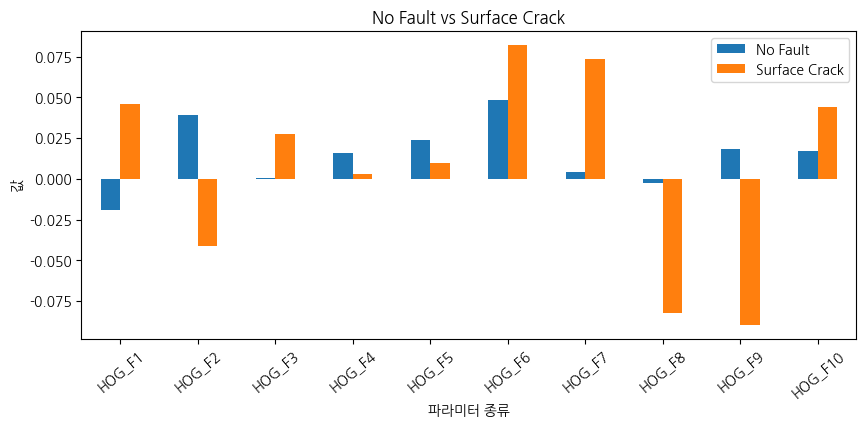

In [13]:
## 막대그래프로 비교해보기
## => No Fault(결함 없음)을 기본값으로 잡고, 이에 대비한 결함 종류 1개씩을 대치시켜서 평균값을 비교해보기
## => 패턴은 가장 큰 차이 보이는 3개 찾기

## 1. No Fault vs Surface crack

# No Fault 만들기
df_no = df[df['Fault_Type']=='No Fault']
#print(df_no.mean(numeric_only=True)) # 값마다 차이가 너무 많이 나서, 열마다 그래프를 묶어서 따로 출력해야겠다고 생각

# Surface Crack 만들기
df_sc = df[df['Fault_Type']=='Surface Crack']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[:10],
    'Surface Crack': df_sc.mean(numeric_only=True)[:10]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Surface Crack")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

Surface Crack은 표면 패턴 특징 F7,8,9에서 큰 격차를 보인다!

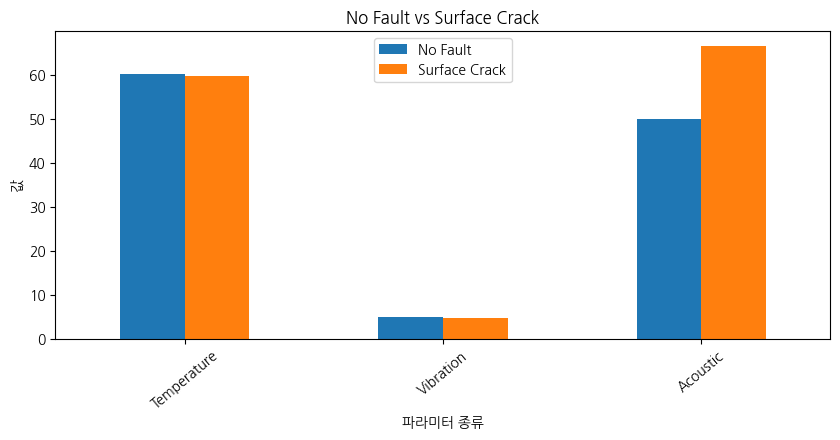

In [14]:
# No Fault 만들기
df_no = df[df['Fault_Type']=='No Fault']

# Surface Crack 만들기
df_sc = df[df['Fault_Type']=='Surface Crack']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[10:13],
    'Surface Crack': df_sc.mean(numeric_only=True)[10:13]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Surface Crack")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

- Surface Crack에서는 No Fault 대비 Acoustic 평균 값 ↑

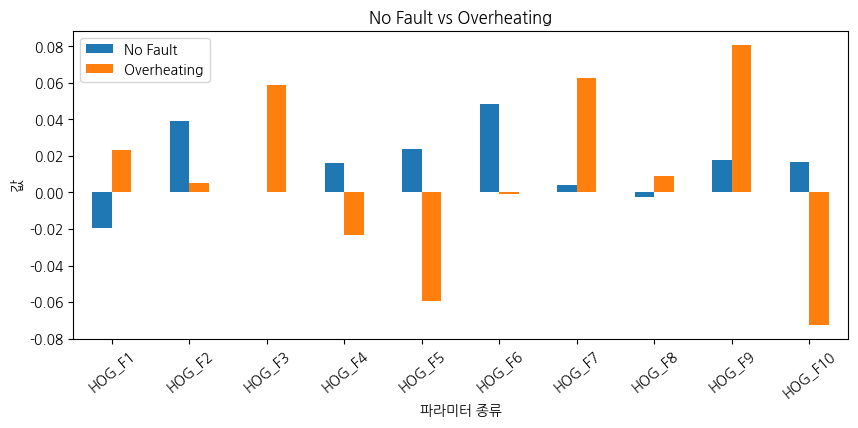

In [15]:
## 2. No Fault vs Overheating

# Overheating 만들기
df_oh = df[df['Fault_Type']=='Overheating']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[:10],
    'Overheating': df_oh.mean(numeric_only=True)[:10]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Overheating")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

Overheating은 표면 패턴 특징 F3,7,10에서 큰 격차를 보인다!

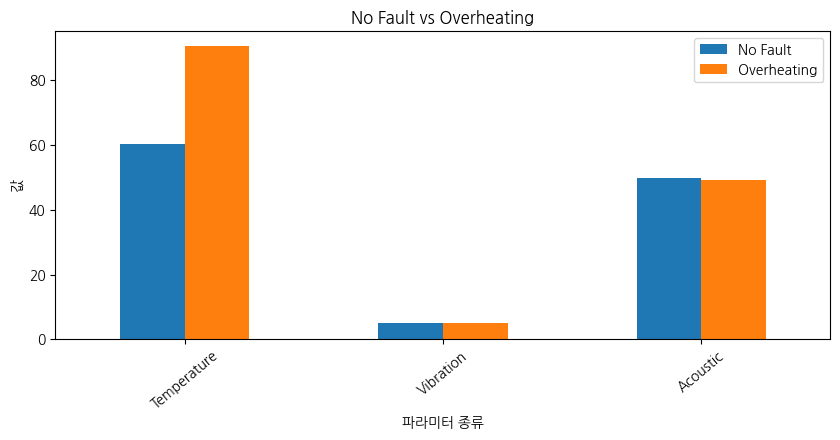

In [16]:
# Overheating 만들기
df_oh = df[df['Fault_Type']=='Overheating']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[10:13],
    'Overheating': df_oh.mean(numeric_only=True)[10:13]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Overheating")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

- Overheating에서는 No Fault 대비 Temperature 평균 값 ↑

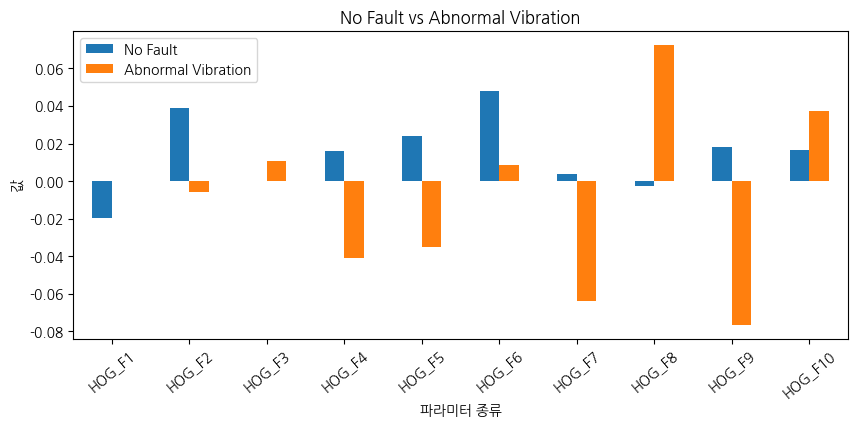

In [17]:
## 2. No Fault vs Abnormal Vibration

# Abnormal Vibration 만들기
df_av = df[df['Fault_Type']=='Abnormal Vibration']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[:10],
    'Abnormal Vibration': df_av.mean(numeric_only=True)[:10]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Abnormal Vibration")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

Abnormal Vibration은 표면 패턴 특징 F7,8,9에서 큰 격차를 보인다!

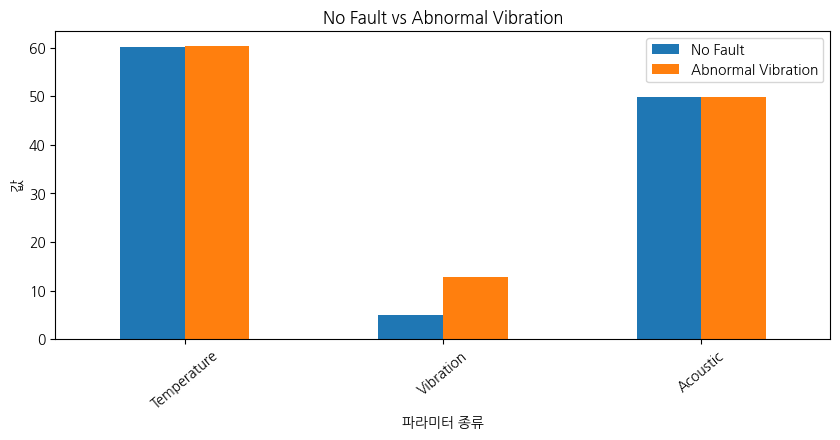

In [18]:
# Abnormal Vibration 만들기
df_av = df[df['Fault_Type']=='Abnormal Vibration']

df_compare = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[10:13],
    'Abnormal Vibration': df_av.mean(numeric_only=True)[10:13]
})

df_compare.plot(kind='bar', figsize=(10,4))
plt.xticks(rotation=40)
plt.title("No Fault vs Abnormal Vibration")
plt.xlabel('파라미터 종류')
plt.ylabel('값')
plt.show()

- Abnormal Vibration에서는 No Fault 대비 Vibration 평균 값 ↑

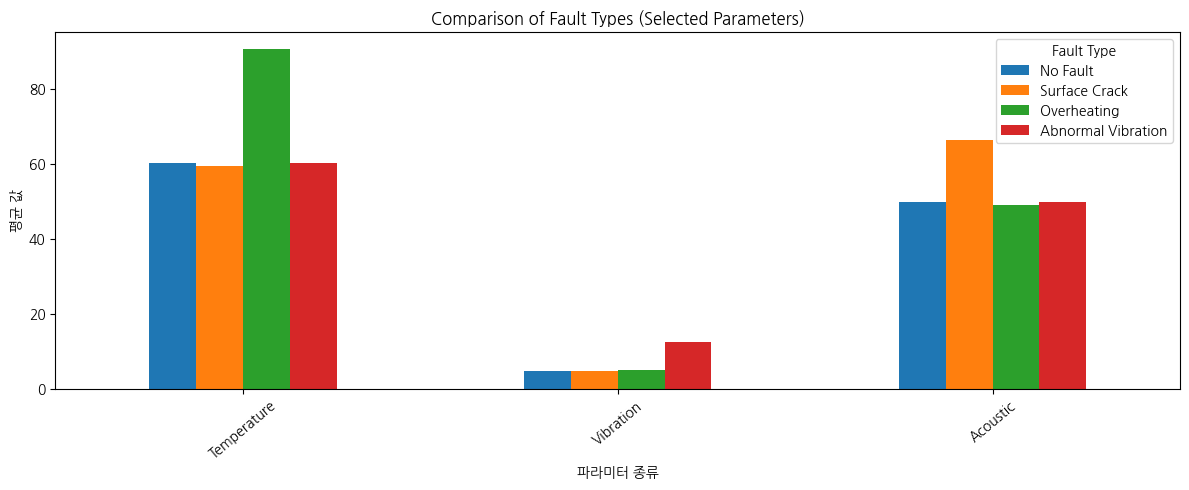

In [19]:
## 모든 값 다 비교해보기 

cols = df_no.columns[10:13]

# Fault Type별 평균값 결합
df_compare_all = pd.DataFrame({
    'No Fault': df_no.mean(numeric_only=True)[10:13],
    'Surface Crack': df_sc.mean(numeric_only=True)[10:13],
    'Overheating': df_oh.mean(numeric_only=True)[10:13],
    'Abnormal Vibration': df_av.mean(numeric_only=True)[10:13]
}, index=cols)

# 그래프 출력
df_compare_all.plot(kind='bar', figsize=(12,5))
plt.xticks(rotation=40)
plt.title("Comparison of Fault Types (Selected Parameters)")
plt.xlabel("파라미터 종류")
plt.ylabel("평균 값")
plt.legend(title="Fault Type")
plt.tight_layout()
plt.show()

### 총 정리 <hr>

1. Surface Crack
- 패턴 특징 : HOG_F7, HOG_F8, HOG_F9에서 큰 차이를 보인다.
- 센서 특성 : Acoustic과 가장 큰 연관을 보인다.
- -> 표면에 균열이 발생하여 공정 소음이 증가한 것으로 생각된다.

2. Overheating
- 패턴 특징 : HOG_F3, HOG_F7, HOG_F10에서 큰 차이를 보인다.
- 센서 특성 : Temperature과 가장 큰 연관을 보인다.
- -> 과열이 곧 온도가 과도하게 올라가는 것이라 연관이 깊다고 생각된다.

3. Abnormal Vibration
- 패턴 특징 : HOG_F7, HOG_F8, HOG_F9에서 큰 차이를 보인다.
- 센서 특성 : Vibration과 가장 큰 연관을 보인다.
- -> 비정상 진동이 발생하는 만큼 진동도 증가하는 것으로 생각된다.

<hr>  Q : 센서 값만으로 결함 유형 예측 가능할까? <hr>

- A : 가능하다. 총 정리에서 볼 수 있듯이 센서 특성과 결함 유형에 연관이 있는 것을 볼 수 있기 때문에, 센서 값을 확인하여 그 값이 어떤 결함의 값과 비슷한지 비교하면 그 결함과 같은 유형의 결함이 발생한다고 예측할 수 있다.

<hr> 공정 개선 제안 <hr>

- 센서 값만으로 결함 유형을 예측할 수 있기 때문에, 이러한 결함을 미리 방지하는 예지보전 기술을 만드는 것이 중요하다고 생각한다. 따라서 공정이 진행되는 동안 실시간 모니터링을 통해 이번에 분석한 데이터와 같은 공정에서 발생하는 패턴, 센서 등의 값들을 분석하고, 이 값들이 결함의 원인이 되는 만큼의 수치로 진행되어가는 것이 보인다면 이를 미리 방지하는 기술을 접목시켜 공정의 품질이나 고장 등을 개선할 수 있다고 생각한다.

- ex: Acoustic 값이 증가하면 표면에 균열이 발생했다고 생각하고 그 공정의 표면을 검사
- ex: 공정의 Temperature가 급격히 증가하면 냉각기 등을 통해 과열이 발생하기 전에 온도 낮춰주기
- ex: 공정의 Vibration값이 증가하면 비정상적인 진동이 어디서 발생하는지 찾아 해결하기